*Group Members*: 

- Nabil Arrouss (qup85ses) 
- Ahmad Pamir Sahak (las06weq) 
- Kohei Fujimura (koj66veq) 
- Heydar Bagloo ( yeq42hip) 

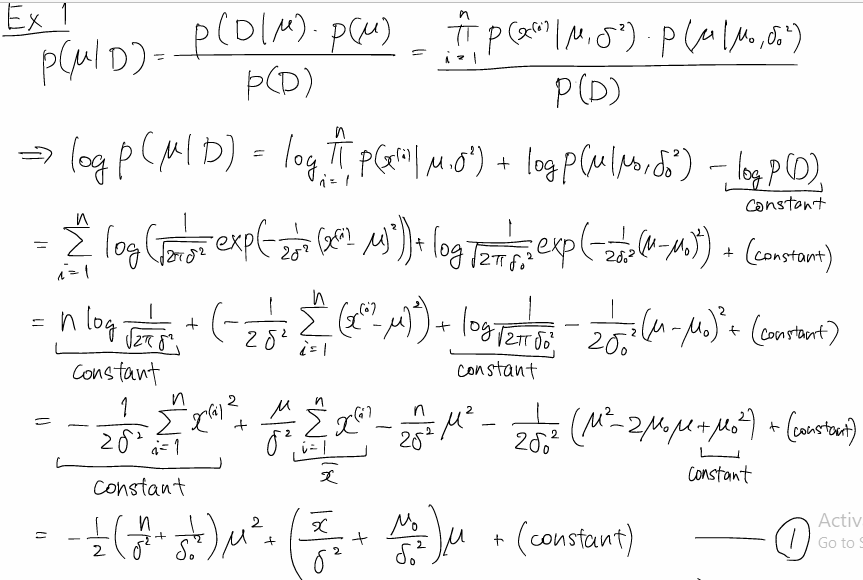
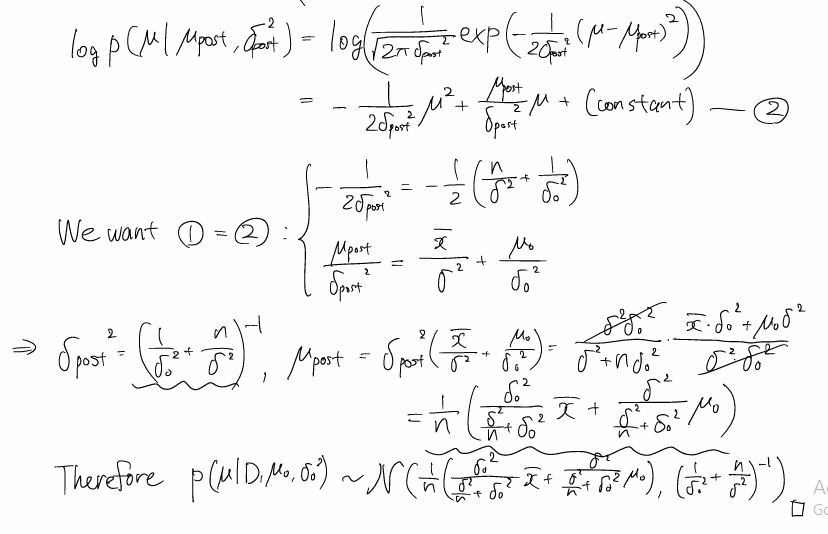

# Exercise 2
### In this Exercise, you are given a dataset with K=200 unique categories, so each datapoint is a category between 1 and 200. Your task is to calculate the parameters, theta, of the underlying multinomial distribution, using MLE and MAP.

In [90]:
import numpy as np
import pandas as pd

df = pd.read_csv('data.csv')
data = df['category'].values
K = 200 

# usually this is not done in practice since this kind of split is biased by order of data! 
split_at = int(len(data) * 0.8) 
train = data[:split_at]
val = data[split_at:]

print(f'K: {K}')
print(f'seen categories K\': {np.unique(train).size}')
print(f'N_train: {len(train)}, N_val: {len(val)}')


K: 200
seen categories K': 164
N_train: 400, N_val: 100


In [91]:
def mle(data):
    classes, counts = np.unique(data, return_counts=True)
    theta_mle = np.zeros(K)   
    theta_mle[classes] = counts / np.sum(counts)
    return theta_mle

In [92]:
theta_mle = mle(train)
assert np.isclose(np.sum(theta_mle), 1.0) 
print(f"Amount of category probabilities equal to zero: {(theta_mle==0).sum()} of {K}")


Amount of category probabilities equal to zero: 36 of 200


In [112]:
def map_estimate(data, alpha):
    theta_map = np.full(K, alpha - 1)
    
    classes, counts = np.unique(data, return_counts=True)
    theta_map[classes] += counts
    
    theta_map = theta_map / np.sum(theta_map)
    
    return theta_map

In [136]:
ALPHA = 1.01 # choose a good value for alpha, you can try different values and evaluate them later
theta_map = map_estimate(train, alpha=ALPHA)
assert np.isclose(np.sum(theta_map), 1.0) 
print(f"Amount of category probabilities equal to zero {(theta_map==0).sum()} of {K}")


Amount of category probabilities equal to zero 0 of 200


In [137]:
def log_likelihood(data, theta):
    epsilon = 1e-10
    classes, counts = np.unique(data, return_counts=True)
    log_lik = np.sum(counts * np.log(theta[classes] + epsilon))
    return log_lik

In [138]:
ll_mle_train = log_likelihood(train, theta_mle)
ll_mle_val = log_likelihood(val, theta_mle)

ALPHA_MLE = 1
theta_map_alpha1_val = map_estimate(train, alpha=ALPHA_MLE)
ll_map_alpha1_val = log_likelihood(val, theta_map_alpha1_val)

ll_map = log_likelihood(val, theta_map)
ll_map_train = log_likelihood(train, theta_map)
ll_map_val = log_likelihood(val, theta_map)

ALPHA=1 on the validation set should give the same log likelihood as the MLE (can you explain why?)

In [139]:
print(f"[TRAIN] Log-Likelihood MLE: {ll_mle_train:.2f}")
print(f"[TRAIN] Log-Likelihood MAP: {ll_map_train:.2f}")

print(f"[VAL] Log-Likelihood MLE: {ll_mle_val:.2f}")
print(f"[VAL] Log-Likelihood MAP with alpha=1: {ll_map_alpha1_val:.2f}")
print(f"[VAL] Log-Likelihood MAP with alpha={ALPHA}: {ll_map_val:.2f}")                            

[TRAIN] Log-Likelihood MLE: -1975.24
[TRAIN] Log-Likelihood MAP: -1975.60
[VAL] Log-Likelihood MLE: -751.02
[VAL] Log-Likelihood MAP with alpha=1: -751.02
[VAL] Log-Likelihood MAP with alpha=1.01: -589.48
